# FIT5202 Assignment 1 : Analysing eCommerce Data

## Table of Contents
* 
    * [Part 1 : Working with RDD](#part-1)
        * [1.1 Data Preparation and Loading](#1.1)
        * [1.2 Data Partitioning in RDD](#1.2)
        * [1.3 Query/Analysis](#1.3)
    * [Part 2 : Working with DataFrames](#2-dataframes)
        * [2.1 Data Preparation and Loading](#2-dataframes)
        * [2.2 Query/Analysis](#2.2)
    * [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)

# Part 1 : Working with RDDs <a class="anchor" name="part-1"></a>
## 1.1 Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries for retail analysis. 

### 1.1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession. To create a SparkSession you first need to build a SparkConf object that contains information about your application, use Melbourne time as the session timezone. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine. 

In [1]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Asg 1 Part 1"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# Import SparkContext and SparkSession classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

# # Method 1: Using SparkSession
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
spark.conf.set("spark.sql.session.timeZone", "Australia/Melbourne")
sc = spark.sparkContext
sc.setLogLevel('ERROR')

1.1.2 Load CUPS csv files into four RDDs.

In [2]:
category_rdd = sc.textFile('sales/category.csv')
users_rdd = sc.textFile("users.csv")
product_rdd = sc.textFile("sales/product.csv")
sales_rdd = sc.textFile("sales/sales.csv")

In [3]:
print(f"####### category_rdd INFO:")
print('Number of partitions:', category_rdd.getNumPartitions())

print(f"####### users_rdd INFO:")
print('Number of partitions:', users_rdd.getNumPartitions())

print(f"####### product_rdd INFO:")
print('Number of partitions:', product_rdd.getNumPartitions())

print(f"####### sales_rdd INFO:")
print('Number of partitions:', sales_rdd.getNumPartitions())


####### category_rdd INFO:
Number of partitions: 2
####### users_rdd INFO:
Number of partitions: 39
####### product_rdd INFO:
Number of partitions: 2
####### sales_rdd INFO:
Number of partitions: 22


1.1.3 For each RDD, remove the header rows and display the total count and first 10 records. (Hint: You can use csv.reader to parse rows into RDDs.)

In [4]:
# category.csv
cat_header = category_rdd.first()
cat_rdd = category_rdd.filter(lambda x: x != cat_header)
cat_rdd.take(10)

['2090971686529663114,appliances.environment.vacuum',
 '2232732116498514828,apparel.jeans',
 '2232732109628244704,apparel.shirt',
 '2232732103294845523,apparel.shoes.step_ins',
 '2232732086500851925,apparel.scarf',
 '2232732100660822557,country_yard.cultivator',
 '2053013558282682943,construction.tools.drill',
 '2053013562527318829,furniture.living_room.cabinet',
 '2110937143172923797,construction.tools.light',
 '2074462942123786261,kids.toys']

In [5]:
# users.csv
users_header = users_rdd.first()
users_rdd = users_rdd.filter(lambda x: x != users_header)
users_rdd.take(10)

['514771925,MERVYN,Unknown,1-5-1963,30A LUCINDA AVENUE,2260,NSW,male,WAMBERAL',
 '531947692,FALLON,Unknown,16-10-2002,82 CAMBERWARRA DRIVE,6025,WA,female,CRAIGIE',
 '560231306,KALIN,Unknown,19-8-2015,74 SOLDIERS ROAD,2281,NSW,male,PELICAN',
 '575248835,PIETTA,Unknown,19-1-1962,"UNIT 1, 1 LARK AVENUE",5023,SA,female,SEATON',
 '575243330,SUMMAH,Unknown,19-4-1973,44 CLARENDON ROAD,2048,NSW,female,STANMORE',
 '516606243,KEIRA,Unknown,9-6-2011,1 VIOLA CLOSE,4868,QLD,female,BAYVIEW HEIGHTS',
 '545807768,VERITY,Unknown,1-2-1980,31-33 KING STREET,3550,VIC,female,BENDIGO',
 '529118965,MAXWELL,Unknown,16-5-2012,15 HARWELL WAY,6721,WA,male,WEDGEFIELD',
 '518625399,NATASHIA,Unknown,5-6-1973,"UNIT 3, 17 BOX STREET",6530,WA,female,WEBBERTON',
 '518273873,JUSTINE,Unknown,27-8-2007,"UNIT 909, 112 GODERICH STREET",6004,WA,male,EAST PERTH']

In [6]:
# product.csv
prod_header = product_rdd.first()
prod_rdd = product_rdd.filter(lambda x: x != prod_header)
prod_rdd.take(10)

['100168127,2053013554096767303,,30.8171196068388',
 '7101887,2232732103764607583,,33.6457534471799',
 '100058603,2053013555438944659,,32.1982006550096',
 '100007811,2232732112782361392,etro,300.111251624047',
 '26400508,2053013553056579841,,139.458912588293',
 '100215722,2134905019189691101,,4.15035271832127',
 '32402016,2232732115777094520,,5.90104832419485',
 '13201248,2232732061804790604,brw,400.468187201711',
 '2701879,2053013563911439225,beko,249.969115457257',
 '15300266,2232732107698864813,,2.85509519214549']

In [7]:
# sales.csv
sales_header = sales_rdd.first()
sales_rdd = sales_rdd.filter(lambda x: x != sales_header)
sales_rdd.take(10)

['338156802,2020-03-27 02:03:48.000000 +00:00,4804056,171.56,513119357,0ad58441-9db9-48bd-9ee7-accf603f06e0',
 '338156808,2020-03-27 02:03:49.000000 +00:00,1005223,209.53,522277649,2ecb2725-2c40-4acb-8ef1-05e39ea4c2cc',
 '338156913,2020-03-27 02:04:11.000000 +00:00,1005212,174.25,632847510,43609582-1818-4885-bd72-3791f3a4ec93',
 '338156921,2020-03-27 02:04:13.000000 +00:00,1005236,231.15,626579483,bbf972ef-8f8d-4a33-bcbd-ac09af67ea40',
 '338156953,2020-03-27 02:04:18.000000 +00:00,1005212,174.25,633245502,90166e0d-d7da-4997-b479-bc3a0fd724d6',
 '338156985,2020-03-27 02:04:24.000000 +00:00,100132156,47.5,541680528,4cd111cc-8716-4720-b7e3-bc3c8ddce98f',
 '338157055,2020-03-27 02:04:37.000000 +00:00,3500009,290.84,618162129,d0bda424-a759-4941-b9be-5091c28009db',
 '338157122,2020-03-27 02:04:48.000000 +00:00,2300214,386.08,626601722,ce913646-936a-4b2e-b6bb-9f6e0d781bc5',
 '338157141,2020-03-27 02:04:52.000000 +00:00,100070443,35.01,604369152,fd55e2cd-dc42-4bf9-a0a1-f207f1c66e5d',
 '3381572

1.1.4 Drop unnecessary columns from RDDs: firstname, lastname, user_session.

In [8]:
users_rdd_trans = users_rdd.map(lambda x: ','.join(x.split(',')[0:1] + x.split(',')[3:]))
users_rdd_trans.take(10)


['514771925,1-5-1963,30A LUCINDA AVENUE,2260,NSW,male,WAMBERAL',
 '531947692,16-10-2002,82 CAMBERWARRA DRIVE,6025,WA,female,CRAIGIE',
 '560231306,19-8-2015,74 SOLDIERS ROAD,2281,NSW,male,PELICAN',
 '575248835,19-1-1962,"UNIT 1, 1 LARK AVENUE",5023,SA,female,SEATON',
 '575243330,19-4-1973,44 CLARENDON ROAD,2048,NSW,female,STANMORE',
 '516606243,9-6-2011,1 VIOLA CLOSE,4868,QLD,female,BAYVIEW HEIGHTS',
 '545807768,1-2-1980,31-33 KING STREET,3550,VIC,female,BENDIGO',
 '529118965,16-5-2012,15 HARWELL WAY,6721,WA,male,WEDGEFIELD',
 '518625399,5-6-1973,"UNIT 3, 17 BOX STREET",6530,WA,female,WEBBERTON',
 '518273873,27-8-2007,"UNIT 909, 112 GODERICH STREET",6004,WA,male,EAST PERTH']

In [9]:
# sales: user_session
sales_rdd_trans = sales_rdd.map(lambda x: ','.join(x.split(',')[0:5]))
sales_rdd_trans.take(10)


['338156802,2020-03-27 02:03:48.000000 +00:00,4804056,171.56,513119357',
 '338156808,2020-03-27 02:03:49.000000 +00:00,1005223,209.53,522277649',
 '338156913,2020-03-27 02:04:11.000000 +00:00,1005212,174.25,632847510',
 '338156921,2020-03-27 02:04:13.000000 +00:00,1005236,231.15,626579483',
 '338156953,2020-03-27 02:04:18.000000 +00:00,1005212,174.25,633245502',
 '338156985,2020-03-27 02:04:24.000000 +00:00,100132156,47.5,541680528',
 '338157055,2020-03-27 02:04:37.000000 +00:00,3500009,290.84,618162129',
 '338157122,2020-03-27 02:04:48.000000 +00:00,2300214,386.08,626601722',
 '338157141,2020-03-27 02:04:52.000000 +00:00,100070443,35.01,604369152',
 '338157271,2020-03-27 02:05:14.000000 +00:00,1306659,431.09,616395888']

### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
1.2.1 For each RDD, print out the total number of partitions and the number of records in each partition. Answer the following questions: How many partitions do the above RDDs have? How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain why it will be partitioned in this number? If I only have one single core CPU in my PC, what is the default partition's number? (Hint: search the Spark source code to try to answer this question.) Write code and your explanation in Markdown cells.

In [10]:
print(f"####### category_rdd INFO:")
print('Number of partitions:', category_rdd.getNumPartitions())
print("Partitioner:{}".format(category_rdd.partitioner))

print(f"####### users_rdd INFO:")
print('Number of partitions:', users_rdd.getNumPartitions())
print("Partitioner:{}".format(users_rdd.partitioner))

print(f"####### product_rdd INFO:")
print('Number of partitions:', product_rdd.getNumPartitions())
print("Partitioner:{}".format(product_rdd.partitioner))

print(f"####### sales_rdd INFO:")
print('Number of partitions:', sales_rdd.getNumPartitions())
print("Partitioner:{}".format(sales_rdd.partitioner))

####### category_rdd INFO:
Number of partitions: 2
Partitioner:None
####### users_rdd INFO:
Number of partitions: 39
Partitioner:None
####### product_rdd INFO:
Number of partitions: 2
Partitioner:None
####### sales_rdd INFO:
Number of partitions: 22
Partitioner:None


Category RRD has 2 partitions, Users RRD has 39 partitions, Product RRD has 2 partitions and Sales RRD has 22 partitions.  

All 4 RRDs have no specified partitioners. In that case, it is partitioned evenly by default to even out the workload of each work node. 

The number of partitions depends on the number of CPU and the size of the dataframe. If there's only a core CPU, the default partition will be one as it depends on the number of CPU available .

1.2.2. Create a user defined function (UDF) to transform category_code to capitalized words. (e.g. apparel.shoes.ballet_shoes shall be converted to “Apparel Shots Ballet_shoes).

In [11]:
def transform_cate(category_code):
    words = category_code.split('.')
    transform = [word.capitalize() for word in words]
    return ' '.join(transform)

1.2.3. Join Product and Category RDDs and Create a new key value RDD, using brand as the key and all of the categories of that brand as the value. Print out the first 5 records of the key-value RDD.

In [16]:
# transform product and category
    # (brand,cate_id)
prod_rdd_2 = prod_rdd.map(lambda x: x.split(',')).\
                        filter(lambda x: x[2] != '') .\
                        map(lambda x: (x[2],x[1]))
                        

    # (category_id,category_code)
cat_rdd_2 = cat_rdd.map(lambda x: x.split(',')).\
                    map(lambda x: (x[0], x[1]))
cat_rdd_2.take(5)

[('2090971686529663114', 'appliances.environment.vacuum'),
 ('2232732116498514828', 'apparel.jeans'),
 ('2232732109628244704', 'apparel.shirt'),
 ('2232732103294845523', 'apparel.shoes.step_ins'),
 ('2232732086500851925', 'apparel.scarf')]

In [25]:
# left outer join 2 rdd as there is no attribute in common
joined_rdd = prod_rdd_2.leftOuterJoin(cat_rdd_2)
joined_rdd = joined_rdd.map(lambda x: (x[0], x[1][0]) if x[1][1] is None else x)
joined_rdd.take(5)

[('beko', '2053013563911439225'),
 ('beko', '2232732092297380188'),
 ('beko', '2053013557385101831'),
 ('beko', '2232732091718566220'),
 ('beko', '2053013557695480347')]

In [17]:
# transform to (brand, {category_ids})
brand_categories_rdd = joined_rdd.groupByKey().map(lambda x: (x[0], set(x[1])))
result = brand_categories_rdd.take(5)

# print the first 5 (brand, (cate_code))
for brand, categories in result:
    print("Brand:", brand)
    print("Categories:", categories)
    print("=" * 50)

Brand: beko
Categories: {'2053013555120177537', '2053013564003713919', '2053013563877884791', '2232732091718566220', '2232732101835227701', '2053013563970159485', '2232732100769874463', '2232732062048060242', '2053013563944993659', '2232732102103663163', '2053013563743667055', '2053013557385101831', '2053013563768832881', '2232732091307524418', '2053013563835941749', '2053013563810775923', '2232732102749585991', '2053013563911439225', '2232732092297380188', '2232732111775728410', '2053013554776244595', '2232732092565815652', '2053013557695480347', '2053013552351936731'}
Brand: cd
Categories: {'2232732100954423843', '2053013557603205653'}
Brand: midea
Categories: {'2053013560899928785', '2232732086928670945', '2232732092565815652', '2053013564003713919', '2053013566176363511', '2053013557452210699', '2053013563877884791', '2053013565983425517', '2232732091718566220', '2232732099519971845', '2232732097473151444', '2232732100342055447', '2232732100769874463', '2232732091391410500', '20530

### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

**1.3.1 Calculate the average daily sales for each year, each month. Print the results as the following format(see assignment specification).**

In [18]:
sales_rdd.take(5)

['338156802,2020-03-27 02:03:48.000000 +00:00,4804056,171.56,513119357,0ad58441-9db9-48bd-9ee7-accf603f06e0',
 '338156808,2020-03-27 02:03:49.000000 +00:00,1005223,209.53,522277649,2ecb2725-2c40-4acb-8ef1-05e39ea4c2cc',
 '338156913,2020-03-27 02:04:11.000000 +00:00,1005212,174.25,632847510,43609582-1818-4885-bd72-3791f3a4ec93',
 '338156921,2020-03-27 02:04:13.000000 +00:00,1005236,231.15,626579483,bbf972ef-8f8d-4a33-bcbd-ac09af67ea40',
 '338156953,2020-03-27 02:04:18.000000 +00:00,1005212,174.25,633245502,90166e0d-d7da-4997-b479-bc3a0fd724d6']

In [19]:
def extract_year_month(col_data):
    parts = col_data.split(" ")[0].split("-")
    year = int(parts[0])
    month = int(parts[1])
    return year, month

# split by ',' + extract time and concate price + remove () & change datatype
sales_rdd_trans = sales_rdd.map(lambda x: x.split(',')).\
                        map(lambda x: (extract_year_month(x[1]),x[3])).\
                        map(lambda x: (x[0][0], x[0][1], float(x[1])))
sales_rdd_trans.take(5)

[(2020, 3, 171.56),
 (2020, 3, 209.53),
 (2020, 3, 174.25),
 (2020, 3, 231.15),
 (2020, 3, 174.25)]

In [20]:
# create new rdd ((year,month),(sales,counter))
# grouped by key:(year, month) + aggregate sales & increase counter
grouped_sales = sales_rdd_trans.map(lambda x: ((x[0], x[1]), (x[2], 1))).\
                            reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))


# find average - total sales / counter
# sort by year and month
average_sales = grouped_sales.mapValues(lambda x: x[0] / x[1] if x[1] > 0 else 0).\
                        sortByKey()


In [21]:
print("year|month|avg_sales")
for (year, month), avg_sales in average_sales.collect():
    print(f"{year}|{month}|{avg_sales:.2f}")


year|month|avg_sales
2019|10|309.56
2019|11|300.12
2019|12|296.18
2020|1|312.61
2020|2|317.57
2020|3|313.56
2020|4|252.93


**1.3.2 Find 10 of the best selling brands. You should display the brand and total revenue in the result.**

In [22]:
# split by comma
sales_key_value = sales_rdd.map(lambda line: (line.split(',')[2], line.split(',')[3]))
sales_key_value.take(5)

[('4804056', '171.56'),
 ('1005223', '209.53'),
 ('1005212', '174.25'),
 ('1005236', '231.15'),
 ('1005212', '174.25')]

In [23]:
# split by comma + filter out empty brand + extract prod_id & brand
prod_key_value = prod_rdd.map(lambda x: x.split(',')).\
                        filter(lambda x: x[2] != '') .\
                        map(lambda x: (x[0],x[2]))
                    
prod_key_value.take(5)

[('100007811', 'etro'),
 ('13201248', 'brw'),
 ('2701879', 'beko'),
 ('11800014', 'sony'),
 ('100093322', 'cd')]

In [24]:
# left outer join
prod_sales = prod_key_value.leftOuterJoin(sales_key_value)
prod_sales.take(15)

[('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75')),
 ('100073140', ('hp', '876.75'))]

In [25]:
# Extract brand and price + calculate total revenue
brand_rdd = prod_sales.map(lambda x: x[1]).\
                map(lambda x: (x[0],float(x[1])))
tt_rev_by_brand = brand_rdd.reduceByKey(lambda a, b: a + b)
tt_rev_by_brand.take(5)

[('alcon', 4419.59),
 ('nike', 654194.3899999999),
 ('midea', 7306327.500000024),
 ('genius', 24857.42),
 ('medi-peel', 3431.3999999999996)]

In [26]:
top_10_brands = tt_rev_by_brand.takeOrdered(10, key=lambda x: -x[1])
print('Top 10 Best Selling Brands:')
for i,(brand, revenue) in enumerate(top_10_brands):
    print(f"{i}: {brand}, Total Revenue: {revenue:.2f}")

Top 10 Best Selling Brands:
0: apple, Total Revenue: 1846051463.73
1: samsung, Total Revenue: 786833558.91
2: xiaomi, Total Revenue: 175269314.73
3: huawei, Total Revenue: 80182987.27
4: lg, Total Revenue: 73917724.57
5: lucente, Total Revenue: 54369150.00
6: sony, Total Revenue: 53442507.92
7: acer, Total Revenue: 53330141.39
8: oppo, Total Revenue: 51687235.69
9: lenovo, Total Revenue: 43567604.38


## Part 2. Working with DataFrames <a class="anchor" name="2-dataframes"></a>

### 2.1 Data Preparation and Loading

**2.1.1. Load CUPS into four separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each columns (Note: Initially, you should read date/time related column as the string type).**

In [27]:
sc.stop()

In [28]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Asg 1 Part 2"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# Import SparkContext and SparkSession classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

# # Method 1: Using SparkSession
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
spark.conf.set("spark.sql.session.timeZone", "Australia/Melbourne")
sc = spark.sparkContext
sc.setLogLevel('ERROR')

In [30]:
df_category = spark.read.csv('sales/category.csv',header=True).dropDuplicates(["category_id"])
df_users = spark.read.csv("users.csv",header=True)
df_product = spark.read.csv("sales/product.csv",header=True)

# there are some duplicated transactions found in sales 
# possibly because of failure of payment resulting multiple transaction of same item
df_sales = spark.read.csv("sales/sales.csv",header=True).dropDuplicates(["sales_timestamp","product_id","price","user_id"])


**2.1.2 Display the schema of the four dataframes.**

In [31]:
print(f"####### df_category schema:")
print(f"Number of partitions: {df_category.rdd.getNumPartitions()}")
df_category.printSchema()

print(f"####### df_users schema:")
print(f"Number of partitions: {df_users.rdd.getNumPartitions()}")
df_users.printSchema()

print(f"####### df_product schema:")
print(f"Number of partitions: {df_product.rdd.getNumPartitions()}")
df_product.printSchema()


print(f"####### df_sales schema:")
print(f"Number of partitions: {df_sales.rdd.getNumPartitions()}")
df_sales.printSchema()

####### df_category schema:
Number of partitions: 1
root
 |-- category_id: string (nullable = true)
 |-- category_code: string (nullable = true)

####### df_users schema:
Number of partitions: 10
root
 |-- user_id: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- suburb: string (nullable = true)

####### df_product schema:
Number of partitions: 3
root
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: string (nullable = true)

####### df_sales schema:
Number of partitions: 9
root
 |-- id: string (nullable = true)
 |-- sales_timestamp: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: string (nullable = true)
 |-- user_id: string 

### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
**2.2.1. Transform the 'sales_time' column in the sales dataframe to the date type; extract the hour in sales_date and create a new column “sales_hour”; after that, show the schema.**

In [32]:
from pyspark.sql.functions import col, to_date, hour,to_timestamp

# transform into timestamp for extracting hour
df_sales = df_sales.withColumn("sales_timestamp", to_timestamp("sales_timestamp", "yyyy-MM-dd HH:mm:ss.SSSSSS XXX"))

# new column 'sales_hour'
df_sales = df_sales.withColumn("sales_hour", hour("sales_timestamp"))

# Convert back 'sales_timestamp' to date
df_sales = df_sales.withColumn("sales_timestamp", to_date(col("sales_timestamp")))

# schema
df_sales.printSchema()



root
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)



In [33]:
# issue raise w/out setting up this: 
# Fail to parse '2020-03-27 02:03:48.000000 +00:00' in the new parser. 
# You can set "spark.sql.legacy.timeParserPolicy" to "LEGACY" to restore 
# the behavior before Spark 3.0, or set to "CORRECTED" and treat it as an invalid datetime string.
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [34]:
df_sales.count()

6697411

**2.2.2. Calculate total sales for each hour, sort your result based on each hour’s sales in a descending order. Print out the sales_hour and total_sales columns.**

In [35]:
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType
df_sales.printSchema()

# Cast 'price' column to float
df_sales = df_sales.withColumn("price", F.col('price').cast(DoubleType()))

df_sales.printSchema()

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)



In [36]:
# aggregate price by sales_hour to find total_sales
df_sales_hour = df_sales.groupBy("sales_hour").agg(F.count('price').alias("total_sales"))

# sort by total_sales
df_sales_hour_sorted = df_sales_hour.orderBy(col("total_sales").desc())

# Show the sales_hour
df_sales_hour_sorted = df_sales_hour.orderBy(col("sales_hour").desc())

df_sales_hour_sorted.show()

+----------+-----------+
|sales_hour|total_sales|
+----------+-----------+
|        23|     399835|
|        22|     434415|
|        21|     471683|
|        20|     492988|
|        19|     492336|
|        18|     473337|
|        17|     451626|
|        16|     411910|
|        15|     344162|
|        14|     232519|
|        13|     114602|
|        12|      50789|
|        11|      31405|
|        10|      29405|
|         9|      41124|
|         8|      62832|
|         7|      99823|
|         6|     158893|
|         5|     219623|
|         4|     281196|
+----------+-----------+
only showing top 20 rows



**2.2.3.Find 10 most profitable categories (profit can be simply defined as price - avg_cost). Print out the category name and total profit. Please print the category name in capitalized word format(hint: you can reuse the UDF defined in part 1.)**

In [37]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType
def transform_cate(category_code):
    words = category_code.split('.')
    transform = [word.capitalize() for word in words]
    return ' '.join(transform)

# register function
transform_cate_udf = udf(transform_cate, StringType())
df_product.printSchema()
df_sales.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)



In [38]:
# convert avg_cost into float
df_product = df_product.withColumn("avg_cost", F.col("avg_cost").cast(DoubleType()))

# join sales product category
df_joined = df_sales.join(df_product, on="product_id").join(df_category, on="category_id")

# find profit & apply udf to category code
df_profit = df_joined.withColumn("profit", (col("price") - col("avg_cost")).cast(DoubleType())).\
                    withColumn("category_name", transform_cate_udf(col("category_code")))  


# groupby to aggregate profit as total profit
df_total_profit = df_profit.groupBy("category_id", "category_name").agg(F.count("profit").alias("total_profit"))

# sort by profit 
df_sorted_profit = df_total_profit.orderBy(col("total_profit").desc())

df_sorted_profit.show(10, truncate=False)



+-------------------+----------------------------+------------+
|category_id        |category_name               |total_profit|
+-------------------+----------------------------+------------+
|2053013555631882655|Electronics Smartphone      |3055630     |
|2232732093077520756|Construction Tools Light    |3010511     |
|2053013554658804075|Electronics Audio Headphone |510410      |
|2232732079706079299|Sport Bicycle               |318066      |
|2053013554415534427|Electronics Video Tv        |237814      |
|2232732099754852875|Appliances Personal Massager|204840      |
|2053013553199186187|Others                      |198882      |
|2053013553559896355|Others                      |197989      |
|2053013558920217191|Computers Notebook          |162896      |
|2232732103101907535|Electronics Clocks          |125647      |
+-------------------+----------------------------+------------+
only showing top 10 rows



The most profitable 10 products are: 
1) Electronics Smartphone
2) Construction Tools Light
3) Electronics Audio Headphone
4) Sport Bicycle      
5) Electronics Video Tv     
6) Appliances Personal Massager
7) Others
8) Others
9) Computers Notebook 
10) Electronics Clocks     


**2.2.4. Use DataFrame filters to find all transactions sold at loss (defined as price < avg_cost), calculate 10 worst loss margin in percentage. (margin is defined as (price - avg_cost)/avg_cost; if price - avg_cost > 0, it’s call a profit margin; otherwise a loss margin)**

In [39]:
df_product.printSchema()
df_sales.printSchema()
df_joined.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: double (nullable = true)

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)

root
 |-- category_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: double (nullable = true)
 |-- category_code: string (nullable = true)



In [40]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType,DoubleType
def transform_cate(category_code):
    words = category_code.split('.')
    transform = [word.capitalize() for word in words]
    return ' '.join(transform)

# register function
transform_cate_udf = udf(transform_cate, StringType())

In [41]:
# create new col: loss_margin
# convert loss_margin into float
# transform cate_code
df_profit = df_joined.withColumn("loss_margin", (col("price") - col("avg_cost")) / col("avg_cost")).\
                    withColumn("loss_margin", col("loss_margin").cast(DoubleType())) .\
                    withColumn("category_name", transform_cate_udf(col("category_code")))  


# filter & sort
df_loss = df_profit.filter(col("loss_margin") < 0)
df_loss_sort = df_loss.orderBy(df_loss.loss_margin)
df_loss_sort.printSchema()

# worst 10
worst_loss_margins = df_loss_sort.select(df_category["category_id"],"category_name", "price", "avg_cost", "loss_margin").distinct()
worst_loss_margins.show(10,truncate=False)


root
 |-- category_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: double (nullable = true)
 |-- category_code: string (nullable = true)
 |-- loss_margin: double (nullable = true)
 |-- category_name: string (nullable = true)

+-------------------+--------------------------+------+----------------+---------------------+
|category_id        |category_name             |price |avg_cost        |loss_margin          |
+-------------------+--------------------------+------+----------------+---------------------+
|2053013563877884791|Appliances Kitchen Hob    |360.34|395.472783241237|-0.08883742378753315 |
|2053013555631882655|Electronics Smartphone    |181.91|183.683105172603|-0.00

The highest loss margin 10 products are: 
1) Construction Tools Light  
2) Appliances Environment Water_heater
3) Appliances Personal Scales   
4) Sport Ski 
5) Sport Ski 
6) Electronics Audio Headphone 
7) Others      
8) Electronics Smartphone 
9) Electronics Telephone       
10) Others

**2.2.5. Draw a barchart to show total sales from different states in each year.**

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df_users.printSchema()
df_sales.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- suburb: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)



In [44]:
# extract year from df_sales
from pyspark.sql.functions import year
df_sales = df_sales.withColumn("year", year("sales_timestamp"))
df_sales.printSchema()

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: date (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)
 |-- year: integer (nullable = true)



In [45]:
# joining df_users & df_sales on user_id
df_joined = df_sales.join(df_users, on="user_id")

# group by year and state to find the total sales
df_joined = df_joined.groupBy("year", "state").sum("price")

# convert to pandas dataframe for plotting
df_pd = df_joined.toPandas()
df_pd

,year,state,sum(price)
0,2020,NSW,3.600175e+08
1,2020,NT,8.322187e+06
2,2019,OT,2.305309e+05
3,2020,ACT,1.895251e+07
4,2019,SA,6.346054e+07
5,2020,WA,1.180696e+08
6,2019,TAS,1.972598e+07
7,2020,VIC,3.014352e+08
8,2019,QLD,1.761439e+08
9,2019,VIC,2.201520e+08


In [46]:
df_pd.dtypes

year            int32
state          object
sum(price)    float64
dtype: object

In [47]:
# changing data type of sum(price)
df_pd["sum(price)"] = df_pd["sum(price)"].astype(float)
df_pd.dtypes

year            int32
state          object
sum(price)    float64
dtype: object

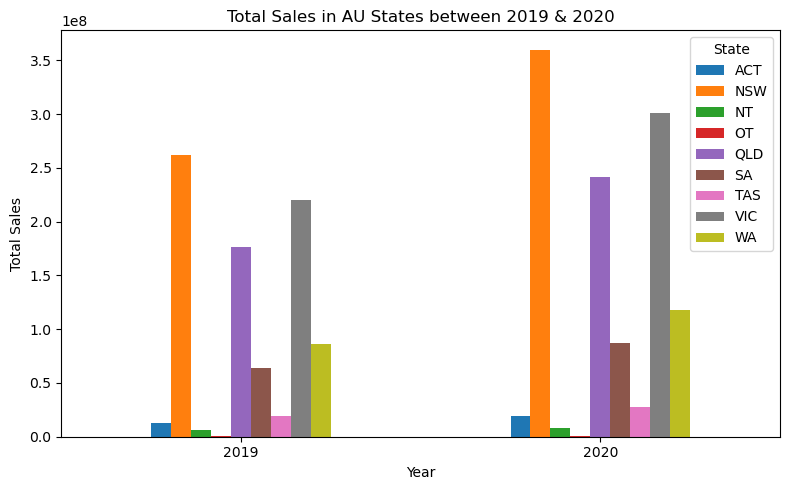

In [48]:
# pivot year as index separated by state
pivot_data = df_pd.pivot(index="year", columns="state", values="sum(price)")

pivot_data.plot(kind ="bar", figsize=(8,5))
plt.xlabel("Year")
plt.xticks(rotation=360)
plt.ylabel("Total Sales")
plt.title("Total Sales in AU States between 2019 & 2020")

plt.legend(title="State")
plt.tight_layout()
plt.show()

The result between 2019 and 2020 are similar: the 3 highest profit states are NSW, VIC and QLD. Sales in 2020 is higher than 2019 in general across all states. This is possibly due to COVID where people depends more on online shopping.

**2.2.6. Draw a scatter plot of customer age and their total spending with MOTH. To limit the number of datapoints, you may show the top 1000 “most valuable” customers only. You may also use log scale for the XY axis.**

In [49]:
df_users.show(5)
df_users.printSchema()
df_sales.show(5)
df_sales.printSchema()

+---------+---------+--------+----------+--------------------+--------+-----+------+--------+
|  user_id|firstname|lastname|       dob|             address|postcode|state|   sex|  suburb|
+---------+---------+--------+----------+--------------------+--------+-----+------+--------+
|514771925|   MERVYN| Unknown|  1-5-1963|  30A LUCINDA AVENUE|    2260|  NSW|  male|WAMBERAL|
|531947692|   FALLON| Unknown|16-10-2002|82 CAMBERWARRA DRIVE|    6025|   WA|female| CRAIGIE|
|560231306|    KALIN| Unknown| 19-8-2015|    74 SOLDIERS ROAD|    2281|  NSW|  male| PELICAN|
|575248835|   PIETTA| Unknown| 19-1-1962|UNIT 1, 1 LARK AV...|    5023|   SA|female|  SEATON|
|575243330|   SUMMAH| Unknown| 19-4-1973|   44 CLARENDON ROAD|    2048|  NSW|female|STANMORE|
+---------+---------+--------+----------+--------------------+--------+-----+------+--------+
only showing top 5 rows

root
 |-- user_id: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |--

In [50]:
from pyspark.sql.functions import to_timestamp

# Change to timestamp to calculate age
df_users = df_users.withColumn("dob", to_timestamp("dob", "dd-MM-yyyy"))
df_sales = df_sales.withColumn("sales_timestamp", to_timestamp("sales_timestamp", "yyyy-MM-dd HH:mm:ss.SSSSSS XXX"))

df_users.printSchema()
df_sales.printSchema()
df_users.show(5)
df_sales.show(5)

root
 |-- user_id: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- suburb: string (nullable = true)

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: timestamp (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_hour: integer (nullable = true)
 |-- year: integer (nullable = true)

+---------+---------+--------+-------------------+--------------------+--------+-----+------+--------+
|  user_id|firstname|lastname|                dob|             address|postcode|state|   sex|  suburb|
+---------+---------+--------+-------------------+--------------------+--------+-----+------+--------+
|51477

In [51]:
# find age: sales_timestamp - dob
from pyspark.sql.functions import datediff, round 
from pyspark.sql.types import IntegerType

In [52]:
df_joined = df_sales.join(df_users, on="user_id")
df_joined = df_joined.withColumn("age_at_sales", 
                                 datediff(df_joined.sales_timestamp, df_joined.dob) / 365)
df_ageint = df_joined.withColumn("age_at_sales",round(col("age_at_sales")).cast(DoubleType()))


df_joined.show(5)

+---------+---------+-------------------+----------+------+--------------------+----------+----+---------+--------+-------------------+----------------+--------+-----+------+-------+-----------------+
|  user_id|       id|    sales_timestamp|product_id| price|        user_session|sales_hour|year|firstname|lastname|                dob|         address|postcode|state|   sex| suburb|     age_at_sales|
+---------+---------+-------------------+----------+------+--------------------+----------+----+---------+--------+-------------------+----------------+--------+-----+------+-------+-----------------+
|128029678|356442081|2020-04-08 00:00:00|  12703931|194.08|6149bcd2-37df-40e...|        16|2020|    SERGE| Unknown|1960-10-23 00:00:00|  13 TRADE PLACE|    3133|  VIC|  male|VERMONT| 59.4986301369863|
|128029678|356456957|2020-04-08 00:00:00|  12703931|194.08|6149bcd2-37df-40e...|        17|2020|    SERGE| Unknown|1960-10-23 00:00:00|  13 TRADE PLACE|    3133|  VIC|  male|VERMONT| 59.4986301369

In [53]:
# aggregate price by user_id
df_ttspending = df_ageint.groupBy("user_id").agg(F.sum("price").alias("total_spending"))
df_ttspending.show(5)

+---------+--------------+
|  user_id|total_spending|
+---------+--------------+
|128029678|        569.89|
|128968633|        714.01|
|136662675|        102.65|
|138340325|          93.5|
|227842721|         91.38|
+---------+--------------+
only showing top 5 rows



In [54]:
# joinining total_spending
df_age_spending = df_ageint.select("user_id", "age_at_sales").distinct()
df_combined = df_age_spending.join(df_ttspending, on="user_id", how='inner')

# order by total spending and limit to only 1000 datapoints
top1000_customers = df_combined.orderBy(F.col("total_spending").desc()).limit(1000)


In [55]:
top1000_customers.printSchema()
top1000_customers.show(15)

root
 |-- user_id: string (nullable = true)
 |-- age_at_sales: double (nullable = true)
 |-- total_spending: double (nullable = true)

+---------+------------+------------------+
|  user_id|age_at_sales|    total_spending|
+---------+------------+------------------+
|553431815|        32.0| 788338.5999999976|
|553431815|        33.0| 788338.5999999976|
|549109608|        60.0| 727569.0300000015|
|569333570|        63.0| 676647.3500000004|
|569333570|        64.0| 676647.3500000004|
|513230794|        44.0| 632006.1000000007|
|595104624|        53.0| 601099.7699999993|
|595104624|        54.0| 601099.7699999993|
|513320236|        59.0| 559629.7900000003|
|513320236|        60.0| 559629.7900000003|
|610871788|        37.0| 541687.4000000003|
|610871788|        38.0| 541687.4000000003|
|568782581|        34.0| 540268.7199999993|
|568782581|        35.0| 540268.7199999993|
|538216048|        42.0|507487.51999999944|
+---------+------------+------------------+
only showing top 15 rows



In [56]:
df_pandas = top1000_customers.toPandas()
df_pandas

,user_id,age_at_sales,total_spending
0,553431815,32.0,788338.60
1,553431815,33.0,788338.60
2,549109608,60.0,727569.03
3,569333570,63.0,676647.35
4,569333570,64.0,676647.35
...,...,...,...
995,525519399,8.0,63966.82
996,530433570,73.0,63945.73
997,570976924,38.0,63935.49
998,512595488,19.0,63912.12


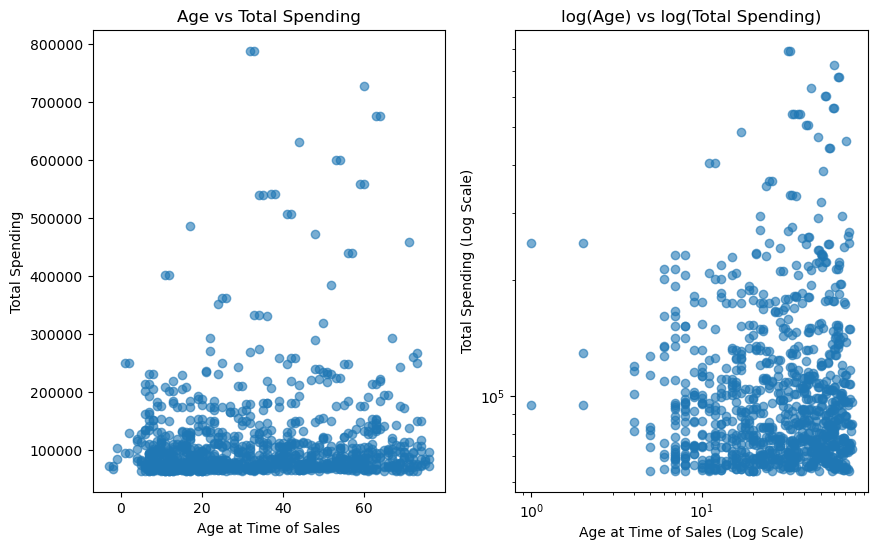

In [57]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2,figsize=(10,6))

# original scale
axs[0].scatter(df_pandas["age_at_sales"], df_pandas["total_spending"],alpha=0.6)
# axs[0].set_yscale("log")
axs[0].set_xlabel('Age at Time of Sales')
axs[0].set_ylabel('Total Spending')
axs[0].set_title('Age vs Total Spending')

# log scale
axs[1].scatter(df_pandas["age_at_sales"], df_pandas["total_spending"],alpha=0.6)
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel('Age at Time of Sales (Log Scale)')
axs[1].set_ylabel('Total Spending (Log Scale)')
axs[1].set_title('log(Age) vs log(Total Spending)')
plt.show()


The left plot shows the total spending vs age at the time of sales in original scales. No obvious pattern can be found as most datapoints are scattered below 200000 so the relationship is hidden by the large amount of total spending.  

Therefore age and total spending are transformed in the right plot. It is observed that large amount of spendings are usually made by larger age customers and the frequency of transaction is much higher compared to younger cusotmers as the points are more intense on the higher age's end. 

### Part 3 RDDs vs DataFrame vs Spark SQL (15%) <a class="anchor" name="part-3"></a>
Implement the following queries using RDDs, DataFrames in SparkSQL separately. Log the  time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference between these 3 approaches. 


In [58]:
sc.stop()

In [59]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Asg 1 Part 3"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# Import SparkContext and SparkSession classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

# # Method 1: Using SparkSession
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
spark.conf.set("spark.sql.session.timeZone", "Australia/Melbourne")
sc = spark.sparkContext
sc.setLogLevel('ERROR')

#### Query: Find top 100 most popular products (by total sales) among user age group 20-40, group by brand, and show total sales revenue of each brand.

#### 3.1. RDD Implementation

In [60]:
%%time
from datetime import datetime
def cal_age(date_str, dob_str):
    if dob_str == 'Unknown':  # found unknown in dob_str that stop the conversion
        return None  
    
    date_str_parts = date_str.split()
    sale_date = datetime.strptime(date_str_parts[0] + ' ' + date_str_parts[1], "%Y-%m-%d %H:%M:%S.%f")
    
    dob = datetime.strptime(dob_str, "%d-%m-%Y")
    age_at_sales = (sale_date - dob).days / 365.0
    return age_at_sales

users_rdd = sc.textFile("users.csv")
product_rdd = sc.textFile("sales/product.csv")
sales_rdd = sc.textFile("sales/sales.csv")

# 0: user_id, 3: dob
users_header = users_rdd.first()
users_rdd = users_rdd.filter(lambda x: x != users_header).\
                    map(lambda x: x.split(',')).\
                    map(lambda x: (x[0], (x[3])))


prod_header = product_rdd.first()
product_rdd = product_rdd.filter(lambda x: x != prod_header).\
                    filter(lambda x: x.split(',')[2] != '') .\
                    map(lambda x: (x.split(',')[0], (x.split(',')[2])))

# 1:timestamp, 2: product_id, 3: price, 4:user_id
sales_header = sales_rdd.first()
sales_rdd = sales_rdd.filter(lambda x: x != sales_header).\
                    map(lambda x: x.split(',')).\
                    map(lambda x: (x[4], (x[1:4])))

# after join with. user_rdd: 
# ('524294157',
#     (['2020-03-27 02:10:08.000000 +00:00', '1005223', '209.53'], '21-5-2013'))

# after join with product_rdd:
#('1802038',
#     (('2020-03-04 18:24:14.000000 +00:00', '180.88', '20-5-1995'), 'tcl'))
join_rdd = sales_rdd.join(users_rdd).\
                    map(lambda x: (x[1][0][1], (x[1][0][0], x[1][0][2], x[1][1]))).\
                    join(product_rdd)


# age_at_sales, product_id, price, brand
# filter out none in cal_age (unknown value) & filter age within 20 & 40
age_rdd = join_rdd.map(lambda x: (cal_age(x[1][0][0], x[1][0][2]), x[0],x[1][0][1], x[1][1])).\
                    filter(lambda x: x[0] is not None and 20 <= x[0] <= 40)

# group brand, product_id as a key to be reduced
# sort in descending order
grouped_rdd = age_rdd.map(lambda x: ((x[3], x[1]), float(x[2]))).\
                    reduceByKey(lambda a, b: a + b).\
                    takeOrdered(100, lambda x: -1*int(x[1]))


# print out result in a more readable way
print("Brand\t\tProduct ID\tTotal Sales")
print("------------------------------------------")
for (brand, product_id), total_sales in grouped_rdd[:10]:
    print(f"{brand}\t\t{product_id}\t\t{total_sales:.2f}")

      

Brand		Product ID	Total Sales
------------------------------------------
apple		1005115		81002782.36
apple		1005105		48142740.12
apple		1005135		27499751.60
apple		1002544		27123527.58
apple		1004249		25860765.96
samsung		1004767		24540275.64
apple		1005116		22800138.50
apple		1005132		12631079.82
apple		1004226		12379464.10
samsung		1005100		12300334.54
CPU times: user 111 ms, sys: 27.8 ms, total: 138 ms
Wall time: 2min 9s


#### 3.2. DataFrame Implementation

Step 1: select col of df_sales to be joined  
Step 2: join with users selected col  
Step 3: join with product selected col  
Step 4: change dtype of dob  
Step 5: change dtype of sales_timestamp  
Step 6: age_at_sales = sales_timestamp - dob  
Step 7: round age into integer  
Step 8: filter age between 20 & 40  
Step 9: group by brand and product & agg price to find total sales  
Step 10: order by total_sales




In [64]:
%%time
# import data
df_users = spark.read.csv("users.csv",header=True)
df_product = spark.read.csv("sales/product.csv",header=True)
df_sales = spark.read.csv("sales/sales.csv",header=True).dropDuplicates(["sales_timestamp","product_id","price","user_id"])

top100_df = df_sales.select('sales_timestamp','price','user_id','product_id').\
                    join(df_users.select("user_id",'dob'), on="user_id", how ='inner').\
                    join(df_product.select('product_id','brand'), on='product_id', how='inner').\
                    withColumn("dob", to_timestamp("dob", "d-MM-yyyy")).\
                    withColumn("sales_timestamp", to_timestamp("sales_timestamp", "yyyy-MM-dd HH:mm:ss.SSSSSS XXX")).\
                    withColumn("age_at_sales",datediff('sales_timestamp', 'dob') / 365).\
                    withColumn("age_at_sales",round(col("age_at_sales")).cast(IntegerType())) .\
                    filter(col("age_at_sales").between(20, 40)).\
                    groupBy("brand",'product_id').agg(round(F.sum("price")).alias("total_sales")).\
                    orderBy(F.col("total_sales").desc()).limit(100)

top100_df.show(truncate=False)
top100_df.printSchema()

+-------+----------+-----------+
|brand  |product_id|total_sales|
+-------+----------+-----------+
|apple  |1005115   |8.3076908E7|
|apple  |1005105   |4.9643991E7|
|apple  |1005135   |2.8410255E7|
|apple  |1002544   |2.7915942E7|
|apple  |1004249   |2.6542799E7|
|samsung|1004767   |2.5047026E7|
|apple  |1005116   |2.3494541E7|
|apple  |1005132   |1.2946337E7|
|samsung|1005100   |1.2590492E7|
|apple  |1004226   |1.2437187E7|
|apple  |1005124   |1.2398787E7|
|apple  |4804056   |1.1602379E7|
|apple  |1002524   |1.1292531E7|
|samsung|1004856   |1.085556E7 |
|apple  |1005118   |1.0826116E7|
|samsung|1004870   |9388996.0  |
|apple  |1005106   |9365056.0  |
|samsung|1005212   |9361223.0  |
|apple  |1005129   |9292801.0  |
|apple  |1004227   |9102049.0  |
+-------+----------+-----------+
only showing top 20 rows

root
 |-- brand: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- total_sales: double (nullable = true)

CPU times: user 36.2 ms, sys: 10.7 ms, total: 46.9 ms


#### 3.3. Spark SQL Implementation

In [62]:
# issue raise w/out setting up this: 
# Fail to parse '2020-03-27 02:03:48.000000 +00:00' in the new parser. 
# You can set "spark.sql.legacy.timeParserPolicy" to "LEGACY" to restore 
# the behavior before Spark 3.0, or set to "CORRECTED" and treat it as an invalid datetime string.
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [63]:
%%time
df_users = spark.read.csv("users.csv",header=True)
df_product = spark.read.csv("sales/product.csv",header=True)
df_sales = spark.read.csv("sales/sales.csv",header=True).dropDuplicates(["sales_timestamp","product_id","price","user_id"])

# register df
df_sales.createOrReplaceTempView("sales")
df_users.createOrReplaceTempView("users")
df_product.createOrReplaceTempView("products")


# join on ids 
# find age_at_sales: timestamp - dob timestamp
# filter between 20 & 40
# group by brand & product_id
# sort by total_sale in desc order 
# limit top 100
query = """
SELECT p.brand, 
        s.product_id,
        ROUND(SUM(s.price)) AS total_sales
FROM sales s
JOIN users u ON s.user_id = u.user_id
JOIN products p ON s.product_id = p.product_id
WHERE ROUND(DATEDIFF(
    TO_TIMESTAMP(s.sales_timestamp, 'yyyy-MM-dd HH:mm:ss.SSSSSS XXX'), 
    TO_TIMESTAMP(u.dob, 'dd-MM-yyyy')
    ) / 365) BETWEEN 20 AND 40
GROUP BY p.brand, s.product_id
ORDER BY total_sales DESC
LIMIT 100
"""
top100_sql = spark.sql(query)

# Show the result
top100_sql.show(10)


+-------+----------+-----------+
|  brand|product_id|total_sales|
+-------+----------+-----------+
|  apple|   1005115|8.3076908E7|
|  apple|   1005105|4.9643991E7|
|  apple|   1005135|2.8410255E7|
|  apple|   1002544|2.7915942E7|
|  apple|   1004249|2.6542799E7|
|samsung|   1004767|2.5047026E7|
|  apple|   1005116|2.3494541E7|
|  apple|   1005132|1.2946337E7|
|samsung|   1005100|1.2590492E7|
|  apple|   1004226|1.2437187E7|
+-------+----------+-----------+
only showing top 10 rows

CPU times: user 21.3 ms, sys: 4.6 ms, total: 25.9 ms
Wall time: 32.3 s


### 3.4 Observe the query execution time among RDD, DataFrame, SparkSQL, which is the fastest and why? (Maximum 500 words.)

<ins>**RDD:**</ins>  
Result: CPU times: user 111 ms, sys: 27.8 ms, total: 138 ms
Wall time: 2min 9s  

<ins>**DataFrame:**</ins>  
Result: CPU times: user 36.2 ms, sys: 10.7 ms, total: 46.9 ms
Wall time: 33 s

<ins>**SparkSQL:**</ins>  
Result: CPU times: user 21.3 ms, sys: 4.6 ms, total: 25.9 ms
Wall time: 32.3 s  


SparkSQL is the fastest and RDD is the slowest.  

The difference is because of the optimization engine in DataFrame, specifically due to Projecty Tunsten which improves memory and CPU efficiency.  

RDD offers only low-level transformation and control on data. There is no inbuilt optimization engine in RDD. The overhead of writing into disk is expansive because it use JAVA serialization. Java objects have a large inherent memory overhead and such serialization  requires communication between nodes. Therefore it takes longer time to process and more memory is taken up. RDD API is also slower in aggregating and grouping data.  

On the other hand, both DataFrame and SparkSQL are optimised using catalyze optimizer. Logical plan is analyzed to resolve references and the plan is locally optimsed before generating physical plans. Plan with the lowest cost model is chosen and hence optimised.  

DataFrame offers custom memory management (Project Tungsten), which serialises data into off-heap memory in binary format so it does not need to be encoded like RDD.  This allows Spark learn more about information than the JVM garbaged collector about the life cycle of memory block and hence allow a more efficient use of memory. Another
reason is the cache-aware computation in Spark. The improvement shortened the wait time of fetching data from memory and this is done by improving the operations like aggregation, sorting and join. CPU time is also optimized with code generation which helps increaseing shuffle network throughput and hence the conversion of data.  


Generated result aligns with the explanation above, where RDD method has the longest CPU time, system time as well as wall time. This means RDD spend the longest in executing the code and handling IO operation or managing memory. Such CPU time includes time of fetching data and sending data between nodes, causing long wait time. DataFrame and SparkSQL have much shorter running time due to Catalyze Optimization inbuilt to the API.

#### Summary

The time might differ when running on different machines. Overall, the DataFrame and SQL queries run faster compared with RDD.


### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html